## Step 1: Business and Data Understanding

### 1. What decisions needs to be made?

Ans: Perform an analysis to recommend the city for Pawdacity’s newest store, based on predicted yearly sales. But this project is just to get the data ready before the prediction.

### 2. What data is needed to inform those decisions?

Ans: The manager gives 4 csv files with the following info:
1. monthly sales for all Pawdacity stores in 2010
2. NAICS(North American Industry Classification System) data of competitors
3. partially parsed data for population
4. demographic data in wyoming

## Step 2: Building the Training Set
| **Column**               | Sum       | Mean    | median  |
| ------------------------ | --------- | ------- | ------- |
| Census Population        | 213,862   | 19,442  | 12,359  |
| Total Pawdacity Sales    | 3,773,304 | 290,254 | 273,024 |
| Households with Under 18 | 34,064    | 3096.73 | 2646.0  |
| Land Area                | 33,071    | 3006.49 | 2748.85 |
| Population Density       | 63        | 5.71    | 2.78    |
| Total Families           | 62,653    | 5695.71 | 5556.49 |

The calucation details are as follows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
store = pd.read_csv("p2-2010-pawdacity-monthly-sales.csv")
nakes = pd.read_csv("p2-wy-453910-naics-data.csv")
popul = pd.read_csv("p2-partially-parsed-wy-web-scrape.csv")
demog = pd.read_csv("p2-wy-demographic-data.csv")

### calculate total Pawdacity sales and collect city names

In [2]:
print(store.iloc[:,5:].sum(axis=1).sum())  # 3773304
print(store.iloc[:,5:].sum(axis=1).median()) #  290254

3773304
273024.0


In [3]:
store.head()

,NAME,ADDRESS,CITY,STATE,ZIP,January,February,March,April,May,June,July,August,September,October,November,December
0,Pawdacity,509 Fort St # A,Buffalo,WY,82834,16200,13392,14688,17064,18360,14040,12960,19224,15984,13392,13176,16848
1,Pawdacity,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,29160,21600,27000,27648,29160,27216,25488,25704,22896,25272,28944,27648
2,Pawdacity,1400 Dell Range Blvd,Cheyenne,WY,82009,47520,44280,47088,46656,43200,45144,44064,45360,47736,42984,44712,47304
3,Pawdacity,3769 E Lincolnway,Cheyenne,WY,82001,32400,26352,31968,30888,30456,32832,29808,32184,30780,31536,30024,32616
4,Pawdacity,2625 Big Horn Ave,Cody,WY,82414,19440,15984,19008,18144,16632,17496,18792,20304,19224,18144,18576,16632


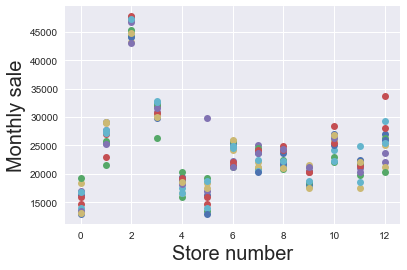

In [4]:
plt.plot(store[store.columns[5:]],'o')
plt.xlabel("Store number",fontsize=20)
plt.ylabel("Monthly sale",fontsize=20)

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 17 columns):
NAME         13 non-null object
ADDRESS      13 non-null object
CITY         13 non-null object
STATE        13 non-null object
ZIP          13 non-null int64
January      13 non-null int64
February     13 non-null int64
March        13 non-null int64
April        13 non-null int64
May          13 non-null int64
June         13 non-null int64
July         13 non-null int64
August       13 non-null int64
September    13 non-null int64
October      13 non-null int64
November     13 non-null int64
December     13 non-null int64
dtypes: int64(13), object(4)
memory usage: 1.8+ KB


In [6]:
store["CITY"].value_counts()

Gillette        2
Cheyenne        2
Evanston        1
Casper          1
Douglas         1
Powell          1
Rock Springs    1
Sheridan        1
Riverton        1
Cody            1
Buffalo         1
Name: CITY, dtype: int64

In [7]:
cities = store["CITY"].unique()  # nump array of shape 11

### calculate census population

In [8]:
popul.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [9]:
popul['Pawdacity'] = False

In [10]:
popul.tail()

,City|County,2014 Estimate,2010 Census,2000 Census,Pawdacity
94,Wamsutter|Sweetwater,<td>503</td>,<td>451</td>,<td>261</td>,False
95,Wheatland ?|Platte,"<td>3,659</td>","<td>3,627</td>","<td>3,548</td>",False
96,Worland ?|Washakie,"<td>5,366</td>","<td>5,487</td>","<td>5,250</td>",False
97,Wright|Campbell,"<td>1,847</td>","<td>1,807</td>","<td>1,347</td>",False
98,Yoder|Goshen,<td>161</td>,<td>151</td>,<td>169</td>,False


In [11]:
import re
s="|".join(cities)
s="^("+s+")"
pool = re.compile(s)

from bs4 import BeautifulSoup
def parsenum(text):
    if str(text).isnumeric():
        return text
    soup = BeautifulSoup(text,'html.parser')
    num =""
    for digit in soup.find("td").text:
        if digit.isnumeric():
            num += digit
        if digit =="[":
            break
    if num.isnumeric():    
        return int(num)
    else:
        return 0
cnt = 0
for i in range(popul.shape[0]):
    row = popul.iloc[i,:]
    popul.set_value(i,"2014 Estimate",parsenum(row["2014 Estimate"]))
    popul.set_value(i,"2010 Census",parsenum(row["2010 Census"]))
    popul.set_value(i,"2000 Census",parsenum(row["2000 Census"]))
    if  pool.search(row["City|County"]):
        popul.set_value(i,"Pawdacity",True)  # set value to True when found
        cnt +=1
print("found {} cities with Pawdacity".format(cnt))

found 11 cities with Pawdacity


In [12]:
popul.iloc[:,1:-1]=popul.iloc[:,1:-1].astype(int)

In [13]:
popul[popul["Pawdacity"] == True]

,City|County,2014 Estimate,2010 Census,2000 Census,Pawdacity
9,Buffalo ?|Johnson,4615,4585,3900,True
13,Casper ?|Natrona,40086,35316,32644,True
14,Cheyenne ??|Laramie,62845,59466,53011,True
17,Cody ?|Park,9740,9520,8835,True
24,Douglas ?|Converse,6423,6120,5288,True
29,Evanston ?|Uinta,12190,12359,11507,True
33,Gillette ?|Campbell,31971,29087,19646,True
73,Powell|Park,6407,6314,5373,True
77,Riverton|Fremont,10953,10615,9310,True
79,Rock Springs|Sweetwater,24045,23036,18708,True


In [14]:
popul.groupby("Pawdacity").median()

,2014 Estimate,2010 Census,2000 Census
Pawdacity,,,
False,529.5,526.5,446.0
True,12190.0,12359.0,11507.0


### calcualte demographic info

In [15]:
demog['Pawdacity']= False
for i in range(demog.shape[0]):
    if pool.search(demog.iloc[i,:]["City"]):
        demog.set_value(i,"Pawdacity",True)

In [16]:
demog.groupby("Pawdacity").median()

,Land Area,Households with Under 18,Population Density,Total Families
Pawdacity,,,,
False,218.720727,124.5,0.285,274.735
True,2748.852900,2646.0,2.780,5556.490


In [17]:
demog[demog['Pawdacity']]

,City,County,Land Area,Households with Under 18,Population Density,Total Families,Pawdacity
10,Gillette,Campbell,2748.852900,4052,5.80,7189.43,True
22,Douglas,Converse,1829.465100,832,1.46,1744.08,True
34,Riverton,Fremont,4796.859815,2680,2.34,5556.49,True
44,Buffalo,Johnson,3115.507500,746,1.55,1819.50,True
48,Cheyenne,Laramie,1500.178400,7158,20.34,14612.64,True
60,Casper,Natrona,3894.309100,7788,11.16,8756.32,True
68,Cody,Park,2998.956960,1403,1.82,3515.62,True
71,Powell,Park,2673.574550,1251,1.62,3134.18,True
80,Sheridan,Sheridan,1893.977048,2646,8.98,6039.71,True
87,Rock Springs,Sweetwater,6620.201916,4022,2.78,7572.18,True


## Step 3: Dealing with Outliers
### Are there any cities that are outliers in the training set? Which outlier have you chosen to remove or impute? 

Ans: As shown in the following table and boxplot, the top outlier is the City "Cheyenne", whose **"Total Families"** eight time of the average. The next outlier will be "Casper". 

** 2nd reviewer**: We should find one outlier for multiple variables (Cheyenne), and two other outliers which will be flagged for less variables.
One of these outliers will be a typo, and the other is really an outlier.

** My response:**  
I will insist my answer. I guess the reviewer will want "Rock Spring" as a outlier because its "Land Area" is the largest. But it really depends what are the predictor variables. I think "Total Families" and "Households with Under 18" weights much more than land. 

In additon, I don't find any typo in my mining data from "p2-partially-parsed-wy-web-scrape.csv"


In [18]:
selector = (demog["Land Area"]> 5000) | (demog["Population Density"]> 10) |\
            (demog["Total Families"] > 10000)
demog[selector]

,City,County,Land Area,Households with Under 18,Population Density,Total Families,Pawdacity
18,Rawlins,Carbon,5322.661628,1307,1.32,2722.43,False
48,Cheyenne,Laramie,1500.178400,7158,20.34,14612.64,True
60,Casper,Natrona,3894.309100,7788,11.16,8756.32,True
87,Rock Springs,Sweetwater,6620.201916,4022,2.78,7572.18,True


In [19]:
popul[popul["2010 Census"]>30000]

,City|County,2014 Estimate,2010 Census,2000 Census,Pawdacity
13,Casper ?|Natrona,40086,35316,32644,True
14,Cheyenne ??|Laramie,62845,59466,53011,True
52,Laramie ?|Albany,32081,30816,27204,False


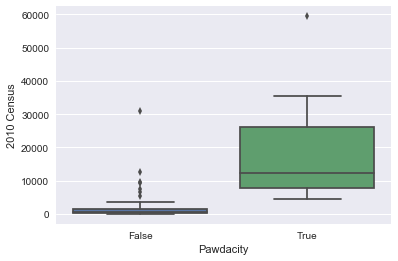

In [20]:
sns.boxplot(y="2010 Census", x = "Pawdacity",data = popul)

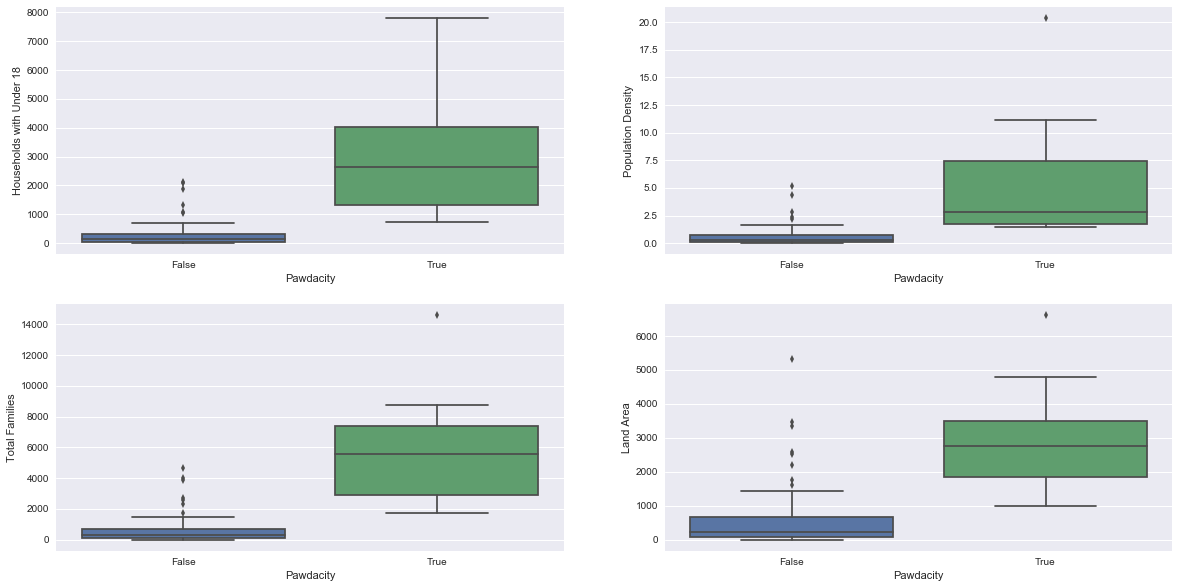

In [21]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.boxplot(x="Pawdacity", y = "Households with Under 18",data = demog)

plt.subplot(222)
sns.boxplot(x="Pawdacity", y = "Population Density",data = demog)

plt.subplot(223)
sns.boxplot(x="Pawdacity", y = "Total Families",data = demog)

plt.subplot(224)
sns.boxplot(x="Pawdacity", y = "Land Area",data = demog)

plt.show()

## Next up
I expect there is a follow-up project to do the actual prediction. But it seems to be removed or somewhere else. So my steps for such prediciton is:
1. With the demographic statistics, figure out which city is above the average but without a Pawdacity store
2. Dig into NAICS to see whether competitors are already in the market of target cities.
3. Use existing data to predict the sales in the target cities, figure out which one will have the best sales.

In [22]:
nakes["SALES VOLUME"].describe()

count        32.000000
mean     173630.875000
std      222548.908781
min           0.000000
25%       65500.000000
50%       86000.000000
75%      147743.250000
max      890000.000000
Name: SALES VOLUME, dtype: float64

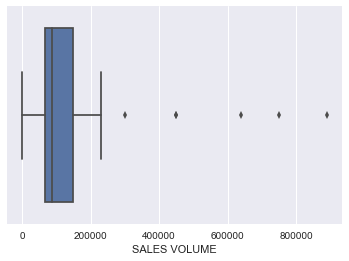

In [23]:
sns.boxplot(nakes["SALES VOLUME"])

In [24]:
nakes[nakes["SALES VOLUME"]>2e5]

,BUSINESS NAME,PHYSICAL CITY NAME,SALES VOLUME,CASS_LastLine
0,Mile High Mobile Pet LLC,Cheyenne,300000,"Cheyenne, WY 82007-3528"
1,Pets City Inc,Cheyenne,640000,"Cheyenne, WY 82009-4851"
7,Don Bruner Sales LLC,Torrington,750000,"Torrington, WY 82240-3516"
19,L and C Pets and Gifts LLC,Evansville,210000,"Evansville, WY 82636"
20,All Gods Creatures,Gillette,450000,"Gillette, WY 82716-2919"
21,Camelot Pet Castle,Gillette,230000,"Gillette, WY 82716-1704"
23,Pet Food Outlet,Gillette,450000,"Gillette, WY 82718-6330"
26,Zoobecks Inc,Rock Springs,890000,"Rock Springs, WY 82901-5105"
